<div class="alert alert-block alert-warning">
    <h1><center> DAKD 2022 EXERCISE 1: DATA UNDERSTANDING  </center></h1>

This exercise relates to the _data understanding_ and  _data preparation_ stages of the Crisp Data Mining (CRISP-DM) model presented on the course. The questions at this stage of a data-analysis project are for example: 

- Is the data quality sufficient?
- How can we check the data for problems?
- How do we have to clean the data?
- How is the data best transformed for modeling?

It may be tempting to just run a model on data without checking it. However, not doing basic checks can ruin your whole analysis and make your results invalid as well as mislead you in further analyses. There is no excuse for not plotting and checking that the data is as we expect and clean. In this exercise we do just that, check the validity of data and familiarize ourselves with a dataset, also discussing preprocessing and multi-dimensional plotting. 
 
------------

### <font color = red> *** FILL YOUR INFORMATION BELOW *** </font>
Hiba Daafane <br>
Student number : 2208046 <br>
hidaaf@utu.fi  <br>
Date : 14/11/2022  <br>


#### General guidance for exercises 

-  You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- Answer **all** questions (except the bonus if you do not want to attempt it), even if you can't get your script to fully work
- Write clear and easily readable code, include explanations of what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat.
- Don't leave it to the last moment! No feedback service during weekends.

### <font color = red> Packages needed for this exercise: </font>
- The exercise can be done without importing any extra packages, but you can import new ones but bear in mind that if you are importing many new packages, you may be complicating your answer. 

In [103]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib 

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# This forces plots to be shown inline in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.rc('axes', labelsize=14)


<div class="alert alert-block alert-warning">
    <h1><center> START OF EXERCISES </center></h1>

##  <font color = dimgrey> 1. Introduction to the dataset </font>

The exercise data depicts data gathered on hospital patients with and without cardiovascular disease, depicted by the target variable **_cardio_**, a common disease associated with a buildup of fatty deposits inside the arteries (blood vessels) of the heart. 
 
 -------
As is often the case with data analysis projects, the features/variables have been retrieved from different sources: 
- doctors notes (texts)
- examination variables that have come from a database containing lab results or taken during a doctors examination
- self reported variables

--------------
The exercise data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in days 
| sex | binary | Male/Female
| weight | numeric | Measured weight of the patient (cm)
| height | numeric | Measured weight of the patient (kg)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| cardio | binary | Whether or not the patient has been diagnosed with cardiac disease.

-----------
#### ***Reading data*** 

It is good practice to read the features in using their correct types instead of fixing them later. Below, there is ready-maed code for you to read in the data, using the data types and column names listed in the above table. Don't change the name of the variable, _data_. It is important in later exercises (for example in ex. 5e) that this is the name of the variable. <font color = red> If you have the dataset in the same folder as this notebook, the path already given to you should work. </font>

---------------

In [109]:
# --- READ IN DATA (no need to change) --------
data_path = "cardiovascular_disease_data_ex_1.csv" #if you just give the name of the file it will look for the data in the same folder as your script
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'weight':'int', 'ap_lo':'int', 'ap_hi':'int', 'sex': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'cholesterol':'category'}) #the main data you use in this exercise should have this variable name, so that code given for you further on will run. 

---------
***Exercise 1 a)***
1. First, print out the first five rows of the data.

2. Then, save the feature names to lists by their types: make three lists named **numeric_features**, **binary_features** and **categorical_features**, containing the **names** of the features of each corresponding type (*you can think in terms of this exercise that binary variables can also be called booleans*).

_Saving the feature names to a list or lists and using them to subset prevents typing errors and avoids repetition!_

In [110]:
# --- Your code here for 1a) ---
from IPython.display import display
display(data.head())


numeric_features = data.select_dtypes(include=np.number).columns.tolist()
binary_features = data.select_dtypes('boolean').columns.to_list()
categorical_features = data.select_dtypes('category').columns.to_list()

,age,sex,height,weight,ap_hi,ap_lo,smoke,active,cardio,cholesterol
0,19797,False,161,55,102,68,False,True,False,elevated
1,22571,True,178,68,120,70,False,False,False,normal
2,16621,True,169,69,120,80,False,True,False,normal
3,16688,False,156,77,120,80,False,True,False,normal
4,19498,True,170,98,130,80,True,True,True,elevated


_________
## <font color = dimgrey> 2. Checking data quality
    
Often in data analysis projects the data has not been gathered exclusively for the data analysis only but originally for other reasons. Because of this, the features are most often not nicely formatted and may have mistakes. It might be tempting to just use the data as is with a model, but it is very important to first check the data for possible mistakes as they can make all the conclusions you make based on your analysis misleading. One good routine for checking data quality is to first calculate statistical descriptives and then to plot the features to check if the values are realistic. 

  
-----------    
    
Some descriptive statistics don't really make sense for certain kinds of features. In pandas, like in many other packages, some functions work differently depending on the data type of a column. In the following exercise we will look at the data descriptive statistics as well as how the behavior can change when the data types are different. 

----------
***2 a)***  Print out the data types of your dataset below.

_Perhaps the most common data types in pandas (see https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes) are **float**, **int**, **bool** and **category**._

In [111]:
# --- 2a) Print the feature types of your dataset --- #
data.dtypes

age               int32
sex             boolean
height            int32
weight            int32
ap_hi             int32
ap_lo             int32
smoke           boolean
active          boolean
cardio          boolean
cholesterol    category
dtype: object

--------
***2 b)*** Use the **DataFrame.describe() method** in the cell below on your data.   


In [112]:
# --- Your code for 2b) --- #
data.describe()

,age,height,weight,ap_hi,ap_lo
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,164.180952,73.895238,127.857143,81.814286
std,2429.010199,7.534648,14.612326,17.508947,9.947652
min,14367.000000,142.000000,45.000000,90.000000,50.000000
25%,17635.750000,158.000000,64.000000,120.000000,80.000000
50%,19778.000000,164.000000,70.000000,120.000000,80.000000
75%,21230.500000,170.000000,81.000000,140.000000,90.000000
max,23565.000000,195.000000,125.000000,190.000000,120.000000


--------
***2 c)*** Did you get all of the features statistics or not? What do you think happened? 

<font color = red> No, the method only provided statistics for the numeric columns, and that is because usually the default output of the DataFrame.describe() method when the data contains feautures with mixed types (numeric, categorical ...) is to provide descrptive statistics only for numeric variables </font>


----------
***2 d)*** Calculate descriptives for the binary (boolean) features and the categorical feature <br>

_tip: in python, same type data structures can in many cases be concatenated using the + operator. If youre using the lists of names you created to subset, you can concatenate the two lists of feature names and use the resulting list to help you subset the dataframe_

In [113]:
# 2d) Your code here #
data[binary_features + categorical_features].describe()

,sex,smoke,active,cardio,cholesterol
count,210,210,210,210,210
unique,2,2,2,2,4
top,False,False,True,False,normal
freq,129,186,162,105,153


----------
Now, we will see ***what would have happened if the data was read in using default settings*** and not giving information about the types of the features (dtypes), giving no arguments to pd.read_csv. 

Run the below cell (no need to modify the code) and look at the output of the cell with the wrongly read data. Compare it with the output of the cell where you used the correctly read data to get the descriptives. 

In [114]:
# read in the dataset with no arguments
wrongly_read_data = pd.read_csv(data_path)

# calculate descriptives for the data that was wrongly read in. 
wrongly_read_data.describe()

,age,sex,height,weight,ap_hi,ap_lo,smoke,active,cardio
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,0.385714,164.180952,73.895238,127.857143,81.814286,0.114286,0.771429,0.500000
std,2429.010199,0.487927,7.534648,14.612326,17.508947,9.947652,0.318918,0.420916,0.501195
min,14367.000000,0.000000,142.000000,45.000000,90.000000,50.000000,0.000000,0.000000,0.000000
25%,17635.750000,0.000000,158.000000,64.000000,120.000000,80.000000,0.000000,1.000000,0.000000
50%,19778.000000,0.000000,164.000000,70.000000,120.000000,80.000000,0.000000,1.000000,0.500000
75%,21230.500000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,1.000000,1.000000
max,23565.000000,1.000000,195.000000,125.000000,190.000000,120.000000,1.000000,1.000000,1.000000


***2 e)*** 
- Looking at the above output, can you now say whats wrong with this presentation and why it was important to define the data types? 

<font color = red> By not specifying the data types beforehand, all of the binary columns were considered as numeric, and so their proporties were lost </font>

-----------------------
## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. Next, we will make use of different plots to check the data quality.  

----------
***3 a)*** 

Plot the numeric features as histograms (see tutorial if you need help).

_tip: if you give only one grid-size argument for plt.subplots() like plt.subplots(3) the grid will be one-dimensional and you can index it with only one indexer._  


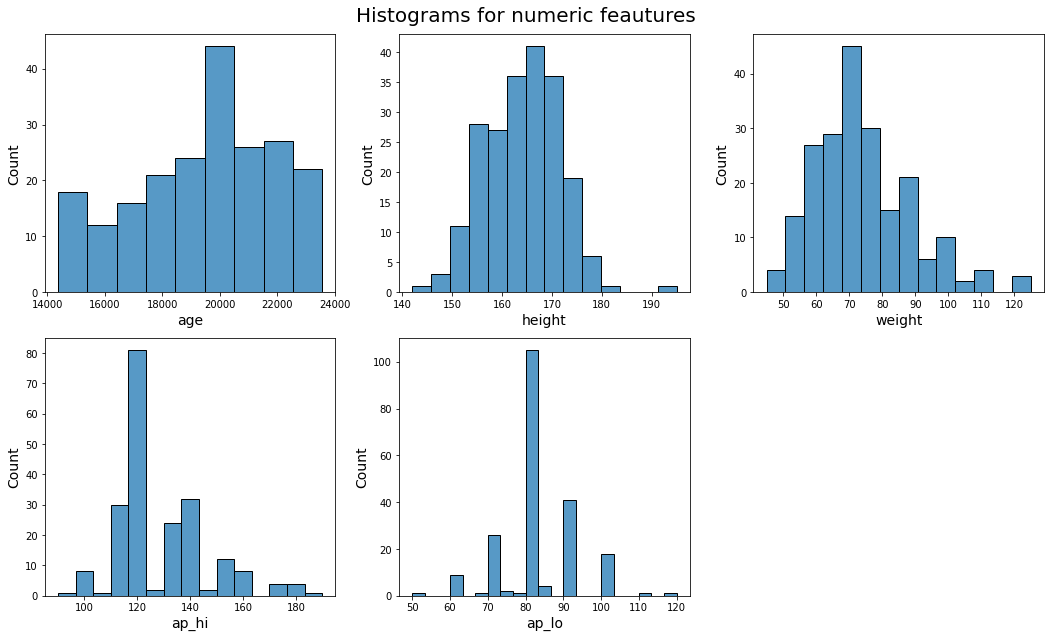

In [115]:
# --- Your code for 3a) here --- #
n_rows=2
n_cols=3
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize= (14.7, 9))
# delete the unecessary last subplot
fig.delaxes(axes[1,2])

#subseting quantitative variables only
for i, column in enumerate(data[numeric_features].columns):
    sns.histplot(data[column],ax=axes[i//n_cols,i%n_cols])
fig.suptitle("Histograms for numeric feautures",fontsize=20)
plt.tight_layout()

_______
## 4. Plotting binary and categorical features

***4 a)*** Plot **barplots** for each of the non-numeric features. **Use fractions, not the real frequencies of the levels of these features**.

--------------

_tip: For plotting, see documentation on axes.bar. To get the fractions, see the value_counts function and its optional argument normalize._

_If you read in the dtypes to be pandas dtype.boolean, in some cases its easier to work with other packages, suchs as matplotlib when they are represented as numbers [0,1] and not True or False. If you get errors you can try to cast them momentarily to be int or float with astype. This does not mean that you've done the exercise incorrectly, just that you have to change them for the plotting package._ 

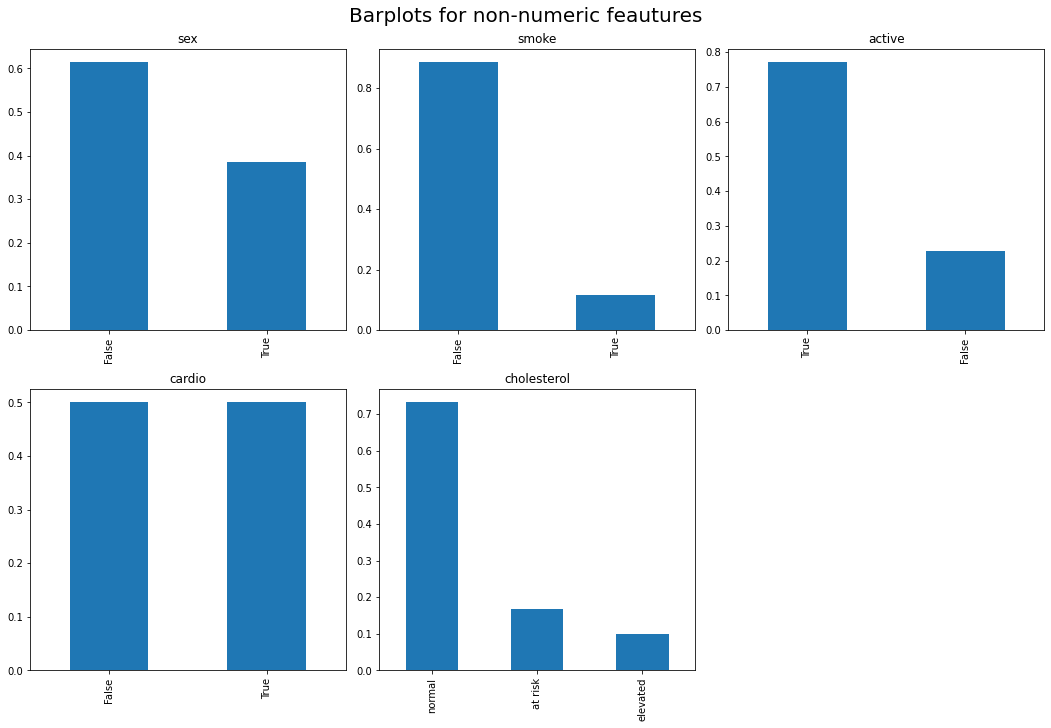

In [133]:
n_rows=2
n_cols=3
# Creating the subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize= (14.7, 10.27))
fig.delaxes(axs[1,2])
for i, column in enumerate(data[binary_features + categorical_features].columns):
    data[column].value_counts(normalize = True).plot(ax=axs[i//n_cols,i%n_cols], kind = 'bar')
    ax=axs[i//n_cols,i%n_cols]
    ax.set_title(column)
fig.suptitle("Barplots for non-numeric feautures",fontsize=20)    
plt.tight_layout()

**4 b)** 

Do you see something odd with one of the features? Fix it. 

_If you read the dtype of the categorical feature to be pandas dtype.categorical, **you have to also use the pandas function remove_categories to remove the category level from the feature**, even if you would have already removed the value. You can do this like: _data['feature_name'] = data['feature_name'].cat.remove_categories("category name to delete")_

In [117]:
### Your code for 4b) here ###
data['cholesterol'] = data['cholesterol'].cat.remove_categories("elev ated")

-------------

## 5. Preprocessing numeric features

Scaling the data improves the performance of machine learning algorithms in many cases, or perhaps better put, can ruin performance if not done. For instance with distance based algorithms covered in the course such as PCA, T-SNE and KNN some features with large values can dominate the distance calculations. 

-----------
We will look at two often used ways of bringing the values to the same scale: **min-max scaling to [0,1]** and **standardizing the features to 0 mean and unit variance**. We will see, that the decision has implications on how the data will look afterwards. Standardizing values is very common in statistics and min-max scaling is for example used in training neural networks, where we want the range to match the range of an activation function in the network. Its good to know both. 

Two functions, sklearn.minmax_scale and sklearn.scale have been imported for you and you can use them in the following exercises.
__________________________



**5 a)** In this exercise we will use boxplots. Explain what a boxplot is and what information it gives you. 

<font color = red> A box-plot is a simple graph consisting of a rectangle from which two straight lines come out in order to represent certain elements of the data. 
- The central value of the graph is the median.
- The edges of the rectangle are the quartiles (25th and 75th percentile).
- The ends of the whiskers are calculated using 1.5 times the interquartile space (the distance between the 1st and 3rd quartiles), indicating the mnimum and maximum values. 
- Values outside the whiskers are represented by dots. An observation outside the whiskers is not necessarily an outlier. On the other hand, it indicates that this observation needs to be studied in more detail.</font>

**5 b)** Min-max numeric attributes to [0,1] and **store the results in a new dataframe called data_min_maxed**. You might have to wrap the data to a dataframe again using pd.DataFrame()

In [118]:
# --- Your code for 5b) here --- #
# use the variable name data_min_maxed
data_min_maxed = data.copy()
data_min_maxed[numeric_features] = pd.DataFrame(minmax_scale(data[numeric_features], feature_range=(0, 1), axis=0, copy=True))

**5 c)** Standardize numeric attributes to 0 mean and unit variance and **store the results in a new dataframe called data_standardized**

In [119]:
# Your code for 5c here --- #
data_standardized = data.copy()
data_standardized[numeric_features] =pd.DataFrame(scale(data[numeric_features], axis=0, with_mean=True, with_std=True, copy=True))

**5 d)** Make two boxplots of the 'age' feature, one plot with the data_min_maxed and one with the data_standardized. Preferably put the plots side-by-side and give each titles. See the tutorial in the beginning for help. 

Text(0.5, 1.0, 'Boxplot for "age" with data_standardized')

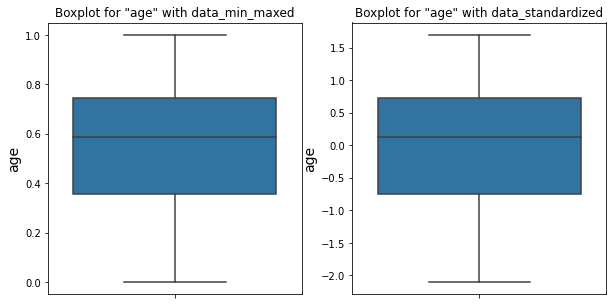

In [120]:
# Your code for 5d) here --- #
n_rows=1
n_cols=2
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize= (10, 5))
sns.boxplot(y = data_min_maxed['age'],ax=axes[0])
sns.boxplot(y = data_standardized['age'],ax=axes[1])

axes[0].set_title('Boxplot for "age" with data_min_maxed')
axes[1].set_title('Boxplot for "age" with data_standardized')

---------

Lets see the differences of these preprocessing methods through an example. We will add an "outlier" point (some point with a large value) to replace the 
last value in both data, then again minmax and standardize and plot. The code to add the value is given for you and you shouldn't change it. 

--------------------

***5e) Do the following:***
1. Take the data for the age feature (age_w_outlier) provided for you
2. Make two variables, age_w_outlier_minmaxed, containing the min-maxed values of the age_w_outlier and
3.  age_w_outlier_standardized containing the standardized values for the age_w_outlier


In [121]:
### Add an outlier, DONT CHANGE THIS CELL CODE, JUST RUN IT ###
data_w_outlier = data.copy() #data should be the name of the variable where you have stored your data!
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150 #change the last value of age to be 150
age_w_outlier = data_w_outlier.age

In [122]:
# --- Your code for 5e) --- 

# create age_w_outlier_minmaxed, keep the names the same
age_w_outlier_minmaxed = minmax_scale(age_w_outlier, feature_range=(0, 1), axis=0, copy=True)

# create age_w_outlier_standardized
age_w_outlier_standardized = scale(age_w_outlier, axis=0, with_mean=True, with_std=True, copy=True)

***Below there is pre-written code for you to plot the different cases. Run it. The code should run if you have named your features appropriately. Run the code.***

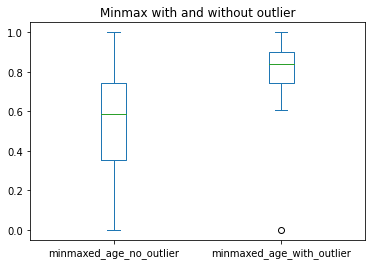

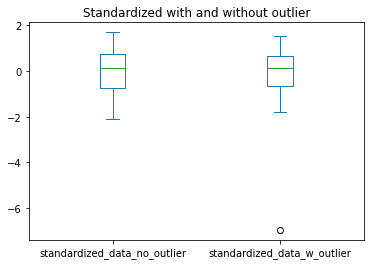

In [123]:
# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, min-maxed.
minmaxed_datas = pd.DataFrame({"minmaxed_age_no_outlier" : data_min_maxed.age, 
              "minmaxed_age_with_outlier": age_w_outlier_minmaxed })

# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, standardized. 
standardized_datas = pd.DataFrame({"standardized_data_no_outlier" : data_standardized.age, 
              "standardized_data_w_outlier": age_w_outlier_standardized })

axes_minmaxed = minmaxed_datas[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_datas[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')

----------
**5 f) Look at the output of the above cell and answer the following**: 

1. Can you notice a difference between the two cases (min-maxed and standardized)? 
2. Can you say something about the difference of the effect of min-maxing and standardization?


<font color = red>
1. Yes we can notice that the min-maxed data was strongly affected by the addition of the outlier, while the standardized data didn't change much
<br>2. We can say that while in both cases the scaling methods didn't eliminate the outlier, the standardization is definitely less sensitive to outliers, while with min-max scaling because we scale the data to a limited range of values, it is far more sensitive to small changes in the data 

---------------
## 6. Preprocessing categorical features



We can roughly divide categorical variables/features to two types:  ***nominal categorical***  and  ***ordinal categorical*** variables/features. Some cases are clear in terms of which of the two a feature falls into. For example nationality is not an ordered feature, but which grade in school someone is has a natural ordering. **One-hot encoding** was presented in the lectures and will be used in the following exercises with different learning methods.


-----
***Nominal categorical features need to be encoded***, because not encoding them implies that they have an order. For example, consider a dataset where you would have rows by different countries, encoded randomly with numbers, for ex. Finland = 1, Norway = 2 and so on. For some analyses and methods this would imply that Norway is somehow "greater" in value than Finland. For some algorithms, the implication would also be, that some of the countries would be "closer" to each other. 

------
***Ordinal categorical features do not necessarily need to be encoded***, but there are cases where it can be wise. One case is that the categories are not even distance from each other, which is the case with the 'cholesterol' feature with the levels 'normal', 'elevated' and 'at risk'. Its not clear that these are equal in distance from each other. When unsure, it may also be better to one-hot encode, and a lot of packages do it for you behind the scenes. Here we decide to one-hot encode.  

---------------------


**6 a)** One-hot-encode the cholesterol-feature and add the one-hot features to the data. Give the new features meaningful names. Print the first rows of the resulting dataframe. 

_tip: pandas has a function for this, google!_

In [124]:
# --- Your code for 6 a) here ---
data = pd.concat([data, pd.get_dummies(data.cholesterol, prefix='cholesterol level')], axis=1)
data.head()

,age,sex,height,weight,ap_hi,ap_lo,smoke,active,cardio,cholesterol,cholesterol level_at risk,cholesterol level_elevated,cholesterol level_normal
0,19797,False,161,55,102,68,False,True,False,elevated,0,1,0
1,22571,True,178,68,120,70,False,False,False,normal,0,0,1
2,16621,True,169,69,120,80,False,True,False,normal,0,0,1
3,16688,False,156,77,120,80,False,True,False,normal,0,0,1
4,19498,True,170,98,130,80,True,True,True,elevated,0,1,0


----------

<div class="alert alert-block alert-warning">
    <h1><center> BONUS EXERCISES </center></h1>

- Below are the bonus exercises. You can stop here, and get the "pass" grade. 
- By doing the bonus exercises below, you can get a "pass with honors", which means you will get one point bonus for the exam. 

The following exercises are more challenging and not as straight-forward and may require some research of your own. However, perfect written answers are not required, but answers that show that you have tried to understand the problems and explain them with your own words. 

____________
##  <font color = dollargreen > 7. BONUS: Dimensionality reduction and plotting with PCA </font>
In the lectures, PCA was introduced as a dimensionality reduction technique. Here we will use it to reduce the dimensionality of the numeric features of this dataset and use the resulting compressed view of the dataset to plot it. This means you have to, run PCA  and then project the data you used to fit the PCA to the new space, where the principal components are the axes.
____________

**7 a)** Explain _in your own words_ what principal component analysis is.

--------

<font color = red> PCA is a method for dimensionality reduction which allows us to transform highly correlated variables into new independent variables. This method helps summarize the information contained in a large dataset into a number of synthetic variables called: Principal components.
The idea is then to be able to project this data onto the nearest hyperplane in order to have a simple representation of our data.</font>

-------------
**7 b)** Do PCA with two components with and without z-score standardization **for the numeric features in the data**. 

In [125]:
# --- Your for 7b) code here --- #

# with z-score standardization
pca = PCA(n_components=2)
x = data_standardized[numeric_features].values
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

# without z-score standardization
pca_no_standardization = PCA(n_components=2)
x_no_standardization = data[numeric_features].values
principalComponents_no_standardization = pca_no_standardization.fit_transform(x_no_standardization)
principalDf_no_standardization = pd.DataFrame(data = principalComponents_no_standardization
             , columns = ['principal component 1', 'principal component 2'])

-------------


**7 c) Plot the data, projected on to the PCA space as a scatterplot, the x-axis being one component and y the other. **Add the total explained variance to your plot as an annotation**. See the documentation of the pca method on how to get the explained variance.

- _Tip: It may be easier to try the seaborn scatterplot for this one. For help see documentation on how to do annotation see tutorial. The total explained variance is the sum of both the components explained variance_.

- _Tip2_: Depending on how you approach annotating the plot, you might have to cast the feature name to be a string. One nice way to format values in python is the f - formatting string, which allows you to insert expressions inside strings (see example below):



------
name = Valtteri<br>
print(f"hello_{name}")

---------
You can also set the number of wanted decimals for floats<br>
For example f'{float_variable:.2f}' would result in 2 decimals making it to the string created

----------

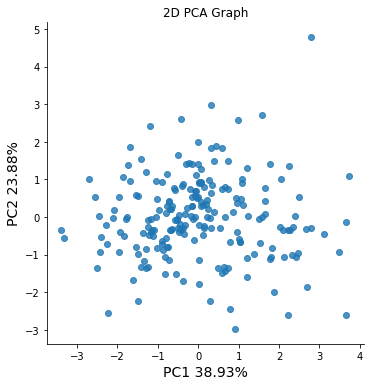

In [126]:
explained_var = pca.explained_variance_ratio_ * 100
ax = sns.lmplot(x='principal component 1', y='principal component 2', data=principalDf, fit_reg=False, height=5)
ax.set(xlabel='PC1 {0:.2f}%'.format(explained_var[0]), ylabel='PC2 {0:.2f}%'.format(explained_var[1]))
plt.title('2D PCA Graph')
plt.show()

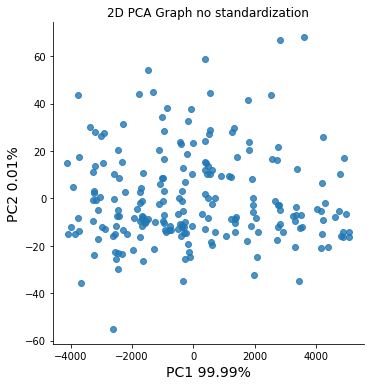

In [127]:
# no standardization
explained_var_no_standardization = pca_no_standardization.explained_variance_ratio_ * 100
ax = sns.lmplot(x='principal component 1', y='principal component 2', data=principalDf_no_standardization, fit_reg=False, height=5)
ax.set(xlabel='PC1 {0:.2f}%'.format(explained_var_no_standardization[0]), ylabel='PC2 {0:.2f}%'.format(explained_var_no_standardization[1]))
plt.title('2D PCA Graph no standardization')
plt.show()

 

**7 d) Gather information for the next part of the exercise and print out the following things:**
- First, the standard deviation of the original data features (not standardized, and with the numeric features only).
- Second, the standard deviation of the standardized numeric features 

In [128]:
# --- Your code for 7d) here --- #

print( "+++"*3, "Standard deviations of numeric features, original data", "+++" * 3)  

print(data[numeric_features].std())

print( "+++"*3, "Standard deviations of numeric features, standardized data", "+++" * 3)  

print(data_standardized[numeric_features].std())

+++++++++ Standard deviations of numeric features, original data +++++++++
age       2429.010199
height       7.534648
weight      14.612326
ap_hi       17.508947
ap_lo        9.947652
dtype: float64
+++++++++ Standard deviations of numeric features, standardized data +++++++++
age       1.002389
height    1.002389
weight    1.002389
ap_hi     1.002389
ap_lo     1.002389
dtype: float64


----------
**7 e) Look at the output above and the explained variance information you added as annotations to the plots. Try to think about the following questions and give a short answer of what you think has happened:** 

1. Where do you think the difference between the amounts of explained variance might come from? 

2. Can you say something about why it is important to scale the features for PCA by looking at the evidence youve gathered?

__Answer in your own words, here it is not important to get the perfect answer but to try to think and figure out what has happened__

------------

<font color = red>
1. We are aware of the fact that PCA is mainly an exerice where we try to mazximize our explained variance, so when we used PCA on the data before standarization it looks like the first componenet explained most of the variance in the data, maybe considering that we have one feauture 'age' with a standrad deviation much greater than the other variables. While after standarization, all our variables now have a standard deviation of 1, and this time other componenets were able to contribute as well.
<br>2. Standarization is important before PCA, because in the case where one variable has higher variance than other variables, the PCA components become biased in the direction of that variable, thinking that that variable alone contains more information about our data
</font>

------------------

## <font color = dollargreen > 8. Bonus: t-SNE and high dimensional data </font> 

Another method that can be used to plot high-dimensional data introduced in the lectures was t-distributed Stochastic Neighbor Embedding (t-SNE).

***8 a)*** Shortly explain t-SNE **in your own words**. 

<font color = red> T-SNE is a nonlinear dimensionality reduction algorithm that constructs a new representation of the data such that nearby data in the original space has a high probability of having nearby representations in the new space. On the contrary, data that are far in the original space have a low probability of having close representations in the new space. </font>

***8 b)*** Run t-SNE for both standardized and non standardized data (as you did with PCA).

In [129]:
# --- Your code for 8b) here --- #


# with z-score standardization
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
tsneDf = pd.DataFrame(data = z
             , columns = ['component 1', 'component 2'])
finalDf = pd.concat([tsneDf, data[['cardio']]], axis = 1)

# without z-score standardization
tsne_no_standardization = TSNE(n_components=2, verbose=1, random_state=123)
z_no_standardization = tsne_no_standardization.fit_transform(x_no_standardization)
tsneDf_no_standardization = pd.DataFrame(data = z_no_standardization
             , columns = ['component 1', 'component 2'])
finalDf_no_standardization = pd.concat([tsneDf_no_standardization, data[['cardio']]], axis = 1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 210 samples in 0.003s...
[t-SNE] Computed neighbors for 210 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 210 / 210
[t-SNE] Mean sigma: 0.897186
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.334824
[t-SNE] KL divergence after 800 iterations: 0.595306
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 210 samples in 0.000s...
[t-SNE] Computed neighbors for 210 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 210 / 210
[t-SNE] Mean sigma: 420.082924
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.981857
[t-SNE] KL divergence after 750 iterations: 0.095663


***8 c)*** Plot t-sne, similarly to PCA making the color of the points correspond to the levels of the cardio feature, but having only numerical features as a basis of the T-SNE.  

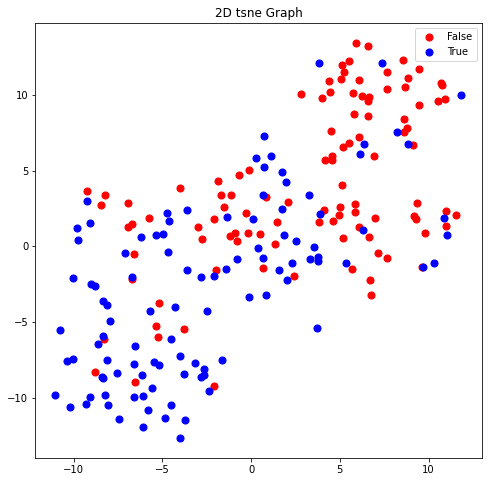

In [130]:
# --- Code for 8 c) --- #
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = list(data['cardio'].unique())
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cardio'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
               , finalDf.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)

#ax = sns.lmplot(x='component 1', y='component 2', data=tsneDf, fit_reg=False, height=5, hue = 'cardio')
plt.title('2D tsne Graph')
plt.show()

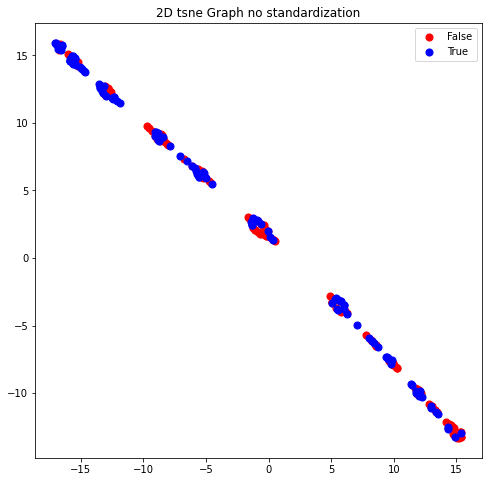

In [131]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

for target, color in zip(targets,colors):
    indicesToKeep = finalDf_no_standardization['cardio'] == target
    ax.scatter(finalDf_no_standardization.loc[indicesToKeep, 'component 1']
               , finalDf_no_standardization.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)

#ax = sns.lmplot(x='component 1', y='component 2', data=tsneDf, fit_reg=False, height=5, hue = 'cardio')
plt.title('2D tsne Graph no standardization')
plt.show()

***8 d)*** 

- What do you think might have happened between the two runs of t-SNE on unstandardized and standardized data? Why is it important to standardize before using the algorithm?

_Here the aim is to think about this and learn, not come up with a perfect explanation. Googling is encouraged. Think about whether t-sne is a distance based algorithm or not?_ 

<font color = red> We know that t-SNE computes a probability distribution on pairs in higher dimensions in a way that similar instances are given a higher probability and different instances are given lower probability. By standardizing our data, our variables converge towards a gaussian distribution, making the different dimentions treated equally. Another thing to note is that the mechanism behind t-SNE works with distance, not variance and age dominates the calculation of the distances. 